<a href="https://colab.research.google.com/github/10-ThiagoB82/Projetos-Publico/blob/main/SISTEMAS_DE_RECOMENDA%C3%87%C3%83O_EM_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sistema de recomendação(filmes).

import pandas as pd

filmes = pd.read_csv('/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv('/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
#primeira tentativa de recomendação.

total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [ ]:
#mais votado, conferindo com o imdb(site) para ver se bate.

filmes.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
#agrupando total_de_votos a tabela.

filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
#top 10 filmes.

filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [ ]:
#descobrir a nota media(mean).

notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
#agrupando notas_medias a tabela.

filmes['nota_media'] = notas_medias
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [ ]:
#heurística de que o total_de_votos não classifica os melhores filmes vms mudar para nota_media.

filmes.sort_values('nota_media', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
#heuristica: nota media com 10 votos no minimo.

filmes.query('total_de_votos >= 10').sort_values('nota_media', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
#heuristica: nota media com 50 votos no minimo.

filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
#recomendação baseada em similiariedade de genero.

eu_assisti = [1,21,19,10,2959,318,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
#depois de Jumanji a recomendação(Adventure|Children|Fantasy).
#foi colocado um drop para retirar da lista os filmes que eu_assisti das recomendações.

aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('generos== "Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.drop(eu_assisti,errors='ignore').sort_values('nota_media', ascending = False).head()

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


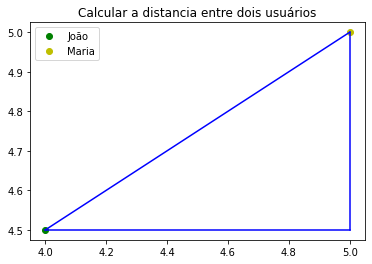

In [ ]:
#procurar usuários 'similares'.

import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['João', 'Maria'])
plt.title('Calcular a distancia entre dois usuários')

plt.plot([4, 5], [4.5, 4.5],color='b', linestyle='-')
plt.plot([4, 5], [4.5, 5],color='b', linestyle="-")
plt.plot([5, 5], [4.5, 5],color='b', linestyle="-")


In [ ]:
#pandas não suporta contas chamar numpy.

import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [ ]:
#feito na unha.
from math import sqrt

def pitagoras(a,b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [ ]:
#feito com uma função numpy.

def pitagoras(a,b):
  return np.linalg.norm(a-b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distancia entre usuários')

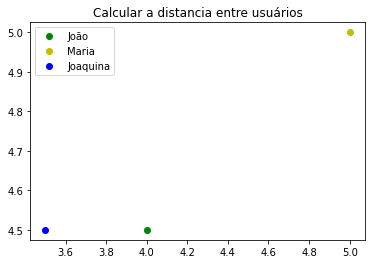

In [ ]:
#acrecentar Joaquina(mais um usuário).
import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calcular a distancia entre usuários')

In [ ]:
#distancia entre os usuários.
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [ ]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a-b)

In [ ]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query('usuarioId==%d' % usuario)
  notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
  return notas_do_usuario

In [ ]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [ ]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [ ]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [ ]:
#nota_esquerda = usuario1.
#nota_direita = usuario4.
#dropna() retirou os NA da tabela.

diferencas = usuario1.join(usuario4, lsuffix='_esquerda', rsuffix='_direita').dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])


11.135528725660043

In [ ]:
#criando uma def  para 2 usuarios.

def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [ ]:
#distancia de 1 usuario para todos.

quantidade_de_usuarios = len(notas['usuarioId'].unique())
print('Temos %d usuaios' % quantidade_de_usuarios)

Temos 610 usuaios


In [ ]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id) 
    distancias.append(informacoes)
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.0


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix='1', rsuffix='5').dropna()

,nota1,nota5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix='1', rsuffix='2').dropna()

,nota1,nota2
filmeId,,
333,5.0,4.0
3578,5.0,4.0


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()

  if(len(diferencas) < minimo):
    return[usuario_id1, usuario_id2, 100000]

  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.0


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,


In [ ]:
#parametros para teste.

def mais_proximos_de(voce_id,numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()

  if(len(diferencas) < minimo):
    return None

  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
      todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar] 
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [ ]:
def mais_proximos_de(voce_id,numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
#ate 50 usuarios (n = 50).

mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [ ]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index


  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar=50)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
139385,4.5,The Revenant (2015),Adventure|Drama,31.0,3.903226
168252,4.5,Logan (2017),Action|Sci-Fi,25.0,4.280000
318,4.0,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
5218,4.0,Ice Age (2002),Adventure|Animation|Children|Comedy,85.0,3.688235


In [ ]:
#sugestão de 1 usuário.

sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


In [ ]:
def mais_proximos_de(voce_id,n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(n_mais_proximos)

In [ ]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar= 300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [ ]:
#sugestão de 2 usuários.

def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar= None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index


  similares = mais_proximos_de(voce,n_mais_proximos = n_mais_proximos , numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)


In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919


In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167


In [ ]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


In [ ]:
#Implementação de KNN..

def KNN(voce_id,k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar= None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index


  similares = KNN(voce, k_mais_proximos = k_mais_proximos , numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
#filtro para recomendação.
#testar um usuário novo.

filmes.sample(100)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.000000
46530,Superman Returns (2006),Action|Adventure|Sci-Fi|IMAX,25.0,3.080000
5507,xXx (2002),Action|Crime|Thriller,24.0,2.770833
98836,Hyde Park on Hudson (2012),Comedy|Drama,1.0,2.000000
6820,Ginger Snaps (2000),Drama|Horror|Thriller,6.0,4.000000
...,...,...,...,...
42638,Grand Theft Parsons (2003),Comedy|Drama,1.0,2.500000
2006,"Mask of Zorro, The (1998)",Action|Comedy|Romance,60.0,3.100000
87485,Bad Teacher (2011),Comedy,9.0,2.888889


In [ ]:
#122904 , 1246 , 2529 , 2329 , 2324 , 1 , 7 , 2 , 1196, 260.

filmes.loc[[122904 , 1246 , 2529 , 2329 , 2324 , 1 , 7 , 2 , 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [ ]:
#adicionar novo usuario.

def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max() + 1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=['filmeId', 'nota'])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [ ]:
#filmes/notas dadas pelo usuario_novo(611).

notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [ ]:
#sugestão para o usuario_novo(611).

sugere_para(611).head

<bound method NDFrame.head of          nota  ... nota_media
filmeId        ...           
171495    5.0  ...   4.500000
81847     5.0  ...   3.916667
1873      5.0  ...   3.750000
8014      5.0  ...   4.250000
103141    5.0  ...   3.875000
...       ...  ...        ...
1722      0.5  ...   3.066667
111659    0.5  ...   2.750000
5784      0.5  ...   2.500000
78174     0.5  ...   1.000000
2017      0.5  ...   3.100000

[2645 rows x 5 columns]>

In [ ]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
171495,5.0,Cosmos,(no genres listed),2.0,4.500000
81847,5.0,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,24.0,3.916667
1873,5.0,"Misérables, Les (1998)",Crime|Drama|Romance|War,10.0,3.750000
8014,5.0,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,10.0,4.250000
103141,5.0,Monsters University (2013),Adventure|Animation|Comedy,16.0,3.875000


In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar= None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index


  similares = KNN(voce, k_mais_proximos = k_mais_proximos , numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix='_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
  recomendacoes = recomendacoes.query('nota_aparicoes_nos_usuarios >= %.2f' % filtro_minimo)
  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
  return recomendacoes.join(filmes)

In [ ]:
def KNN(voce_id,k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
109487,4.600000,5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
318,4.500000,5,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
79132,3.916667,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


In [ ]:
sugere_para(611).head()

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
318,4.500000,8,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
919,4.400000,5,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,92.0,3.880435
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
356,4.350000,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
7361,4.312500,8,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305


In [ ]:
sugere_para(611, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
593,4.266667,15,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
296,4.264706,17,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
4973,4.192308,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
318,4.176471,17,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
46578,4.150000,10,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117
590,4.136364,11,Dances with Wolves (1990),Adventure|Drama|Western,164.0,3.835366
7361,4.133333,15,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
4878,4.125000,12,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
1213,4.100000,10,Goodfellas (1990),Crime|Drama,126.0,4.250000


**Existem diversos sistemas de recomendação, com alguns critérios que podem ser utilizados
, nesse projeto foi feito por baixo dos panos um algoritmo chamado k-NN ("os k vizinhos mais próximos"). Com base nisso, 
geramos recomendações para um conjunto de dados muito famoso chamado MovieLens, do grupo GroupLens.**